In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Crime Data.csv')
df.shape

(982638, 28)

In [ ]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
982633,242011172,08/20/2024 12:00:00 AM,08/17/2024 12:00:00 AM,2300,20,Olympic,2033,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,3700 WILSHIRE BL,NaN,34.0617,-118.3066
982634,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284
982635,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
982636,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868
982637,240910892,08/13/2024 12:00:00 AM,08/12/2024 12:00:00 AM,2300,9,Van Nuys,914,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,6900 VESPER AV,NaN,34.1961,-118.4510


In [ ]:
df = df.drop(columns = ["Cross Street", "Status", "AREA", "Crm Cd", "Part 1-2", "Premis Cd", "Crm Cd 4", "Crm Cd 3", "Weapon Used Cd"])


In [ ]:

df['DATE OCC'] = df['DATE OCC'].str[:10]
df['Date Rptd'] = df['Date Rptd'].str[:10]
# df.tail()
# now we are going to convert to panda time series objects
df['DATE OCC'] = pd.to_datetime(
                            df['DATE OCC'],
                            format = '%m/%d/%Y')
df['Date Rptd'] = pd.to_datetime(
                            df['Date Rptd'],
                             format = '%m/%d/%Y')
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION,LAT,LON
982633,242011172,2024-08-20,2024-08-17,2300,Olympic,2033,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1822,36,F,C,BAR/COCKTAIL/NIGHTCLUB,NaN,Invest Cont,341.0,NaN,3700 WILSHIRE BL,34.0617,-118.3066
982634,240710284,2024-07-24,2024-07-23,1400,Wilshire,788,VEHICLE - STOLEN,NaN,0,NaN,NaN,STREET,NaN,Invest Cont,510.0,NaN,4000 W 23RD ST,34.0362,-118.3284
982635,240104953,2024-01-15,2024-01-15,100,Central,101,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 0400 0416,0,X,X,HOTEL,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,745.0,NaN,1300 W SUNSET BL,34.0685,-118.2460
982636,240309674,2024-04-24,2024-04-24,1500,Southwest,358,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 0334 0416 0445 0449 1202,70,F,W,SIDEWALK,STICK,Invest Cont,230.0,NaN,FLOWER ST,34.0215,-118.2868
982637,240910892,2024-08-13,2024-08-12,2300,Van Nuys,914,VEHICLE - STOLEN,NaN,0,NaN,NaN,PARKING LOT,NaN,Invest Cont,510.0,NaN,6900 VESPER AV,34.1961,-118.4510


In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,Wilshire,784,VEHICLE - STOLEN,NaN,0,M,O,STREET,NaN,Adult Arrest,510.0,998.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,Central,182,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,330.0,998.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,Southwest,356,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,480.0,NaN,1400 W 37TH ST,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,NaN,Invest Cont,343.0,NaN,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,1200,Hollywood,666,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,SIDEWALK,NaN,Invest Cont,354.0,NaN,1900 TRANSIENT,34.0944,-118.3277


In [ ]:
print(df['DATE OCC'].dtype)
print(df['Date Rptd'].dtype)
df['Year'] = df['DATE OCC'].dt.year
year_counts = df['Year'].value_counts()
print(year_counts)
# okay the previous code shows that it has been properly converted to a datetime object

datetime64[ns]
datetime64[ns]
Year
2022    235152
2023    232130
2021    209805
2020    199787
2024    105764
Name: count, dtype: int64


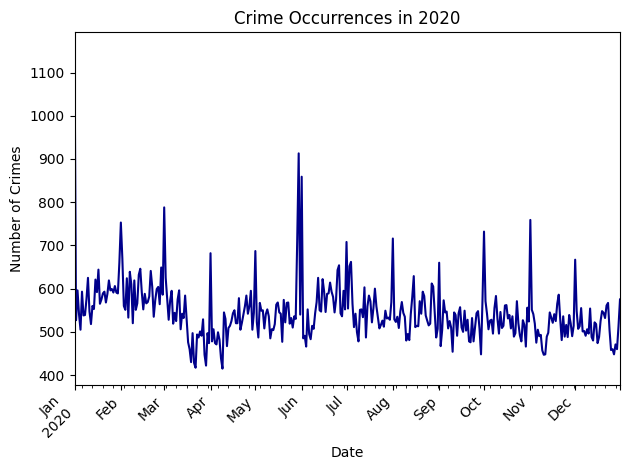

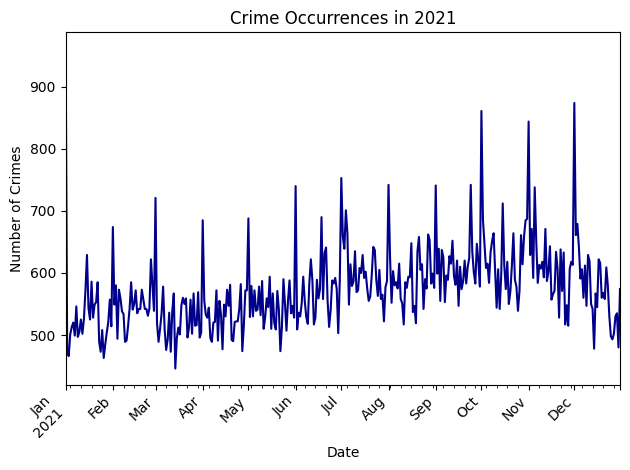

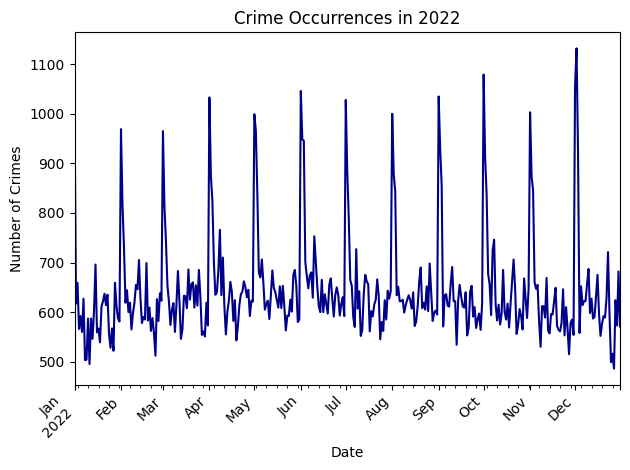

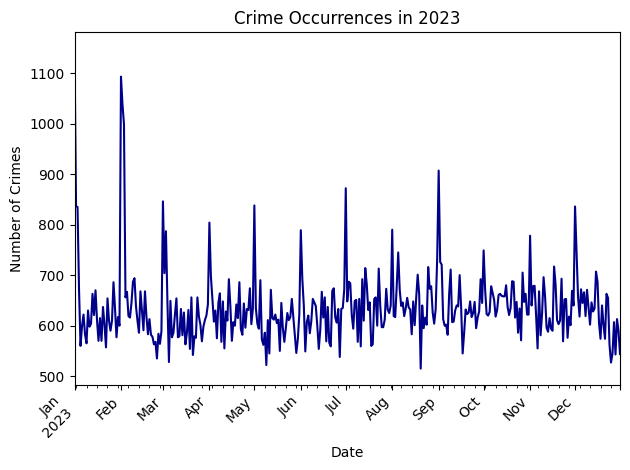

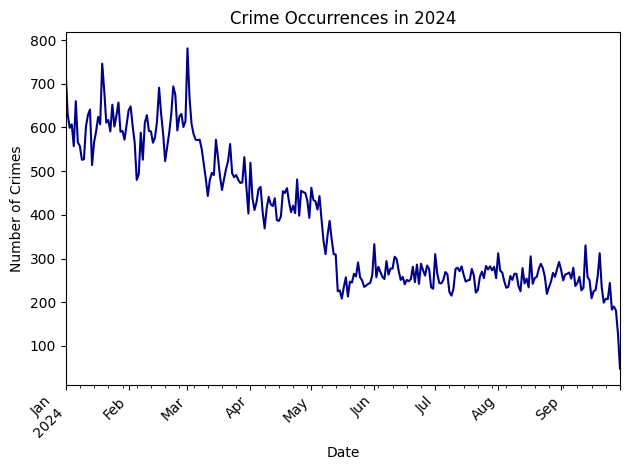

In [ ]:
  # Extract the year


df['Year'] = df['DATE OCC'].dt.year  # Extract the year

for year in df['Year'].unique():
    year_data = df[df['Year'] == year]  # Filter data for the current year
    year_data.groupby('DATE OCC')['DR_NO'].count().plot(kind='line', color ="darkblue")
    plt.title(f'Crime Occurrences in {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

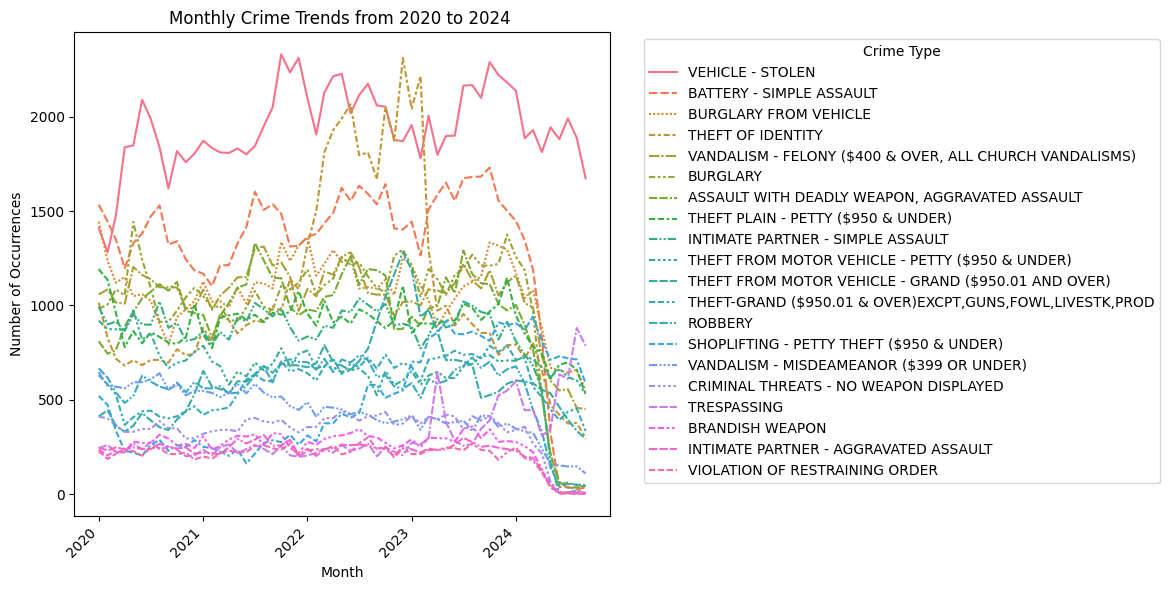

In [ ]:
df["YearMonth"] = df["DATE OCC"].dt.to_period("M")
df.head()
# counting the occurences of each crime type by each month
crime_counts = df.groupby(['YearMonth', 'Crm Cd Desc']).size().reset_index(name='Count')
crime_pivot = crime_counts.pivot(index='YearMonth', columns='Crm Cd Desc', values='Count')
crime_pivot.head()
crime_pivot.fillna(0, inplace=True) # some crimes didnt occur in a month so going to replace with the number zero instead
crime_pivot.index = crime_pivot.index.to_timestamp()
# going to calculate the top 20 crimes!
top_20_crimes = crime_pivot.sum().nlargest(20).index
crime_pivot = crime_pivot[top_20_crimes]
# making the plot now!
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_pivot)
plt.title('Monthly Crime Trends from 2020 to 2024 ')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.legend(title = 'Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()


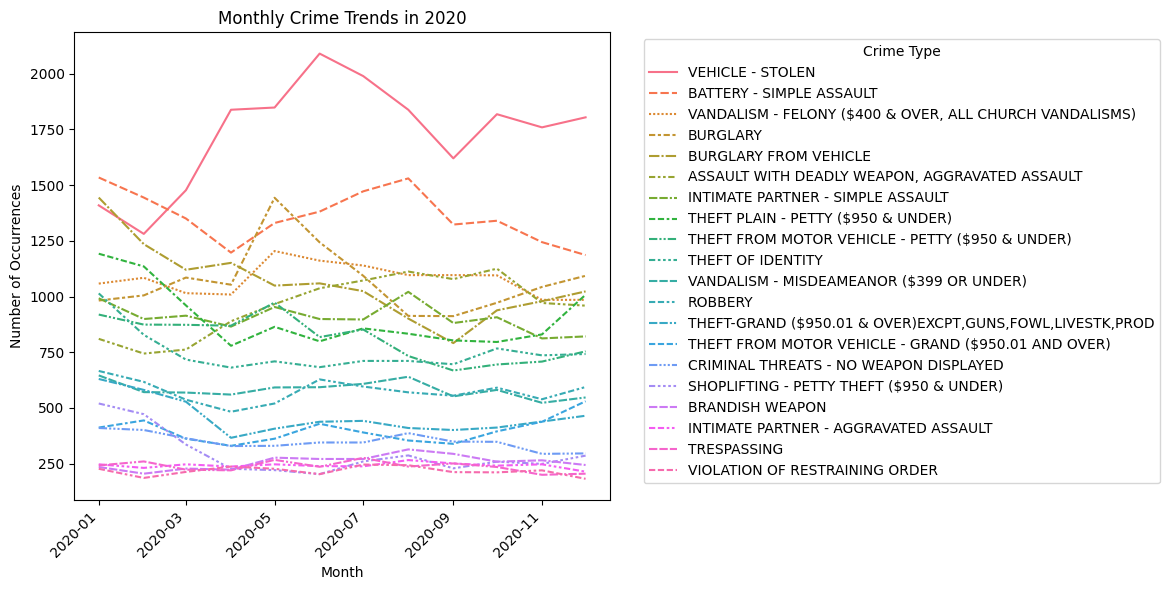

In [ ]:
# going to make the same graph as previous but only going to do it in year 2020 because we are interested in covid's impact and protests
year_2020_data = df[df['Year'] == 2020]
year_2023_data = df[df['Year'] == 2023]
crime_counts = year_2020_data.groupby(['YearMonth', 'Crm Cd Desc']).size().reset_index(name='Count')
crime_pivot_2020 = crime_counts.pivot(index='YearMonth', columns='Crm Cd Desc', values='Count')
crime_pivot_2020.fillna(0, inplace=True)
crime_pivot_2020.index = crime_pivot_2020.index.to_timestamp()


# going to calculate the top 20 crimes!
top_20_crimes = crime_pivot_2020.sum().nlargest(20).index
crime_pivot_2020 = crime_pivot_2020[top_20_crimes]

# making the plot now!
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_pivot_2020)
plt.title('Monthly Crime Trends in 2020')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.legend(title = 'Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

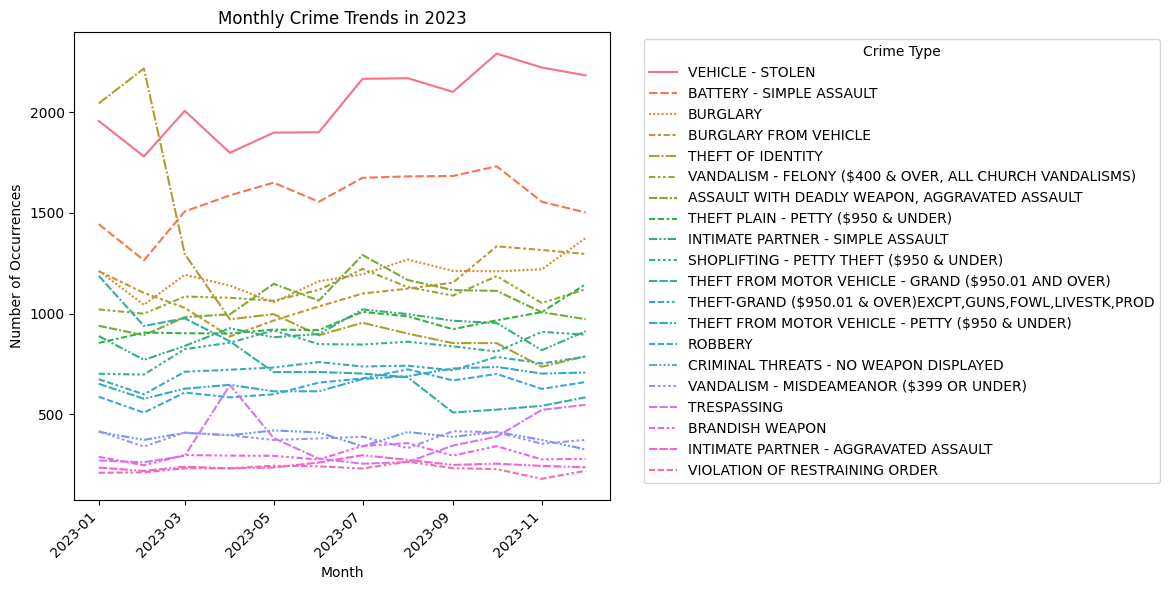

In [ ]:
# going to compare to 2023; a more "normal" year
crime_counts_2023 = year_2023_data.groupby(['YearMonth', 'Crm Cd Desc']).size().reset_index(name='Count')
crime_pivot_2023 = crime_counts_2023.pivot(index='YearMonth', columns='Crm Cd Desc', values='Count')
crime_pivot_2023.fillna(0, inplace=True)
crime_pivot_2023.index = crime_pivot_2023.index.to_timestamp()


# going to calculate the top 20 crimes!
top_20_crimes_2023 = crime_pivot_2023.sum().nlargest(20).index
crime_pivot_2023 = crime_pivot_2023[top_20_crimes_2023]

# making the plot now!
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_pivot_2023)
plt.title('Monthly Crime Trends in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.legend(title = 'Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION,LAT,LON,Year,YearMonth
0,190326475,2020-03-01,2020-03-01,2130,Wilshire,784,VEHICLE - STOLEN,NaN,0,M,...,STREET,NaN,Adult Arrest,510.0,998.0,1900 S LONGWOOD AV,34.0375,-118.3506,2020,2020-03
1,200106753,2020-02-09,2020-02-08,1800,Central,182,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,...,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,330.0,998.0,1000 S FLOWER ST,34.0444,-118.2628,2020,2020-02
2,200320258,2020-11-11,2020-11-04,1700,Southwest,356,BIKE - STOLEN,0344 1251,19,X,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,480.0,NaN,1400 W 37TH ST,34.0210,-118.3002,2020,2020-11
3,200907217,2023-05-10,2020-03-10,2037,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,...,CLOTHING STORE,NaN,Invest Cont,343.0,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,2020,2020-03
4,220614831,2022-08-18,2020-08-17,1200,Hollywood,666,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,...,SIDEWALK,NaN,Invest Cont,354.0,NaN,1900 TRANSIENT,34.0944,-118.3277,2020,2020-08


Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174413
UNKNOWN WEAPON/OTHER WEAPON                        35945
VERBAL THREAT                                      23802
HAND GUN                                           20107
SEMI-AUTOMATIC PISTOL                               7246
KNIFE WITH BLADE 6INCHES OR LESS                    6824
UNKNOWN FIREARM                                     6568
OTHER KNIFE                                         5874
MACE/PEPPER SPRAY                                   3728
VEHICLE                                             3243
ROCK/THROWN OBJECT                                  2731
PIPE/METAL PIPE                                     2464
BOTTLE                                              2412
FOLDING KNIFE                                       2260
STICK                                               2246
CLUB/BAT                                            2087
KITCHEN KNIFE                                       1918
AIR PISTOL/REVOLVER

Text(0, 0.5, 'Number of Occurrences')

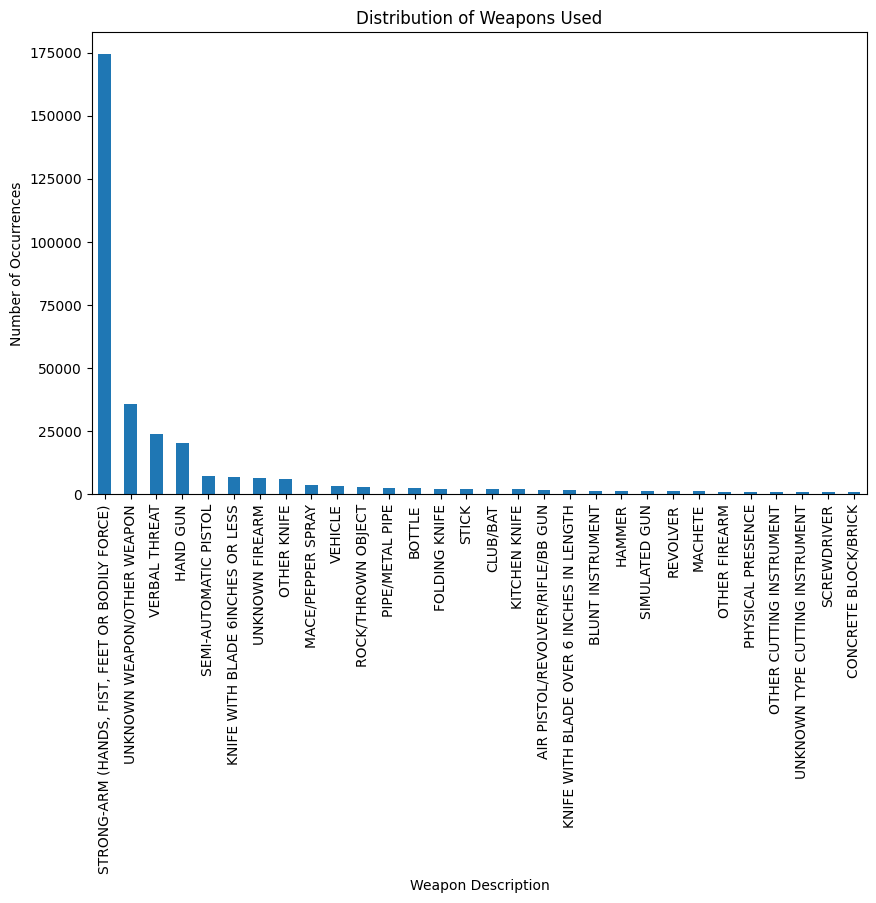

In [ ]:
# going to look at the weapons utilized
weapon_counts = df['Weapon Desc'].value_counts()
pd.set_option("display.max_rows", None)
print(weapon_counts)
top_30_weapons = weapon_counts.head(30)
# going to make a bar chart of weapons
plt.figure(figsize=(10, 6))
top_30_weapons.plot(kind='bar')
plt.title('Distribution of Weapons Used')
plt.xlabel('Weapon Description')
plt.ylabel('Number of Occurrences')
# group rifles, stabby things, firearms,

In [ ]:
# lets begin looking at the ARIMA/SARIMA model
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima
from pmdarima.arima import auto_arima

In [ ]:
# creating a subset of the data that groups the number of crimes by each month
crimes_per_month= df.groupby(['YearMonth']).size().reset_index(name='Count')
crimes_per_month.head()
# grouped by date (separated into month day and year; treated as three separate columns) and only used specific columns
# okay going to group a different way to see if that impacts MSE and RMSE
# first going to create three separate columns for each component of the date; Month, Day and Year
# df_grouped = df.groupby([df['DATE OCC'].dt.to_period('M'), 'AREA NAME', "Crm Cd Desc", "Vict Sex", "Vict Descent", "Premis Desc", "Weapon Desc", "Status Desc"]).size().reset_index(name='crime_count')
# df_grouped['Month'] = df_grouped['DATE OCC'].dt.month
# df_grouped['Day'] = df_grouped['DATE OCC'].dt.day
# df_grouped['Year'] = df_grouped['DATE OCC'].dt.year
# df_grouped.head()


,YearMonth,Count
0,2020-01,18560
1,2020-02,17278
2,2020-03,16187
3,2020-04,15701
4,2020-05,17228


In [ ]:
# starting with parameter analysis
# link for all the following code: https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/
stepwise_fit = auto_arima(crimes_per_month['Count'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d= None, D=0, trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1087.927, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1037.511, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1277.824, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1035.661, Time=0.41 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1054.819, Time=0.98 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1039.402, Time=1.88 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1005.311, Time=0.81 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=990.707, Time=1.37 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=982.509, Time=6.23 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=7.80 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.30 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=5.57 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=991

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   57
Model:             SARIMAX(2, 0, 2)x(0, 0, [1], 12)   Log Likelihood                -471.479
Date:                              Thu, 24 Oct 2024   AIC                            956.958
Time:                                      17:08:50   BIC                            971.260
Sample:                                           0   HQIC                           962.516
                                               - 57                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    888.5201    512.213      1.735      0.083    -115.398    1892.439
ar.L1          1.8698      0.186     10.066      0.000       1.506       2.234
ar.L2         -0.9222      0.189     -4.874      0.000      -1.293      -0.551
ma.L1         -0.7190      0.243     -2.964      0.003      -1.194      -0.244
ma.L2          0.1452      0.218      0.666      0.505      -0.282       0.572
ma.S.L12       0.5200      0.206      2.526      0.012       0.117       0.924
sigma2      7.977e+05      0.137   5.83e+06      0.000    7.98e+05    7.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.77
Prob(Q):                              1.00   Prob(JB):                         0.25
Heteroskedasticity (H):               1.64   Skew:                            -0.13
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.01e+22. Standard errors may be unstable.
"""

In [ ]:
# splitting the data into train/test sets
training = crimes_per_month[:int(0.8*len(crimes_per_month))] # utilizing 80% of the data
testing = crimes_per_month[int(0.8*len(crimes_per_month)):] # utilizing 20% of the data
# fitting sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(training['Count'], order=(1, 1, 1), seasonal_order=(2, 1, 1, 12))
result = model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Count   No. Observations:                   45
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -259.796
Date:                            Thu, 24 Oct 2024   AIC                            531.592
Time:                                    17:08:51   BIC                            540.386
Sample:                                         0   HQIC                           534.507
                                             - 45                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4251      1.787     -0.238      0.812      -3.928       3.078
ma.L1          0.4933      1.599      0.308      0.758      -2.641       3.627
ar.S.L12      -1.1078      2.767     -0.400      0.689      -6.532       4.316
ar.S.L24      -0.1315      0.474     -0.278      0.781      -1.060       0.797
ma.S.L12       0.9548      3.094      0.309      0.758      -5.109       7.019
sigma2      6.388e+05   8.93e-05   7.16e+09      0.000    6.39e+05    6.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.85   Prob(JB):                         0.56
Heteroskedasticity (H):               0.94   Skew:                             0.41
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.89e+25. Standard errors may be unstable.
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Date', ylabel='Number of Occurrences'>

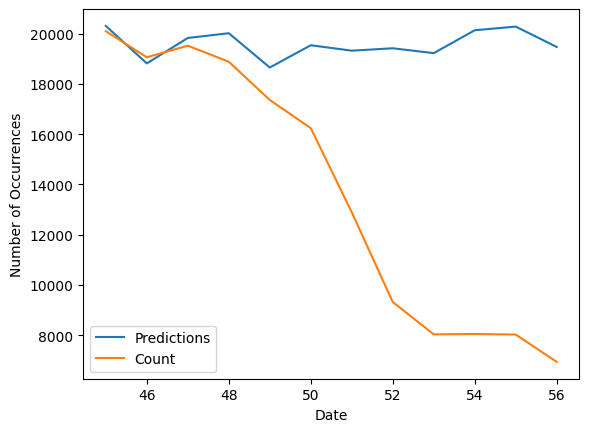

In [ ]:
# predictions of arima model vs test
start = len(training)
end = len(training) + len(testing) - 1
predictions = result.predict(start=start, end=end, typ='levels').rename('Predictions')
#plotting predictions vs actual
predictions.plot(legend=True)
# going to change the x and y axis title name
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
# going to change
testing['Count'].plot(legend=True)
# okay yay this works but i should try debugging the code so the graphs are more interpretable

In [ ]:
# going to evaluate the model
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
# calculating the root mean squared error
rmse(testing['Count'], predictions)

7823.191185185013

In [ ]:
# calculating mean squared error
mean_squared_error(testing['Count'], predictions)

61202320.31995648

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

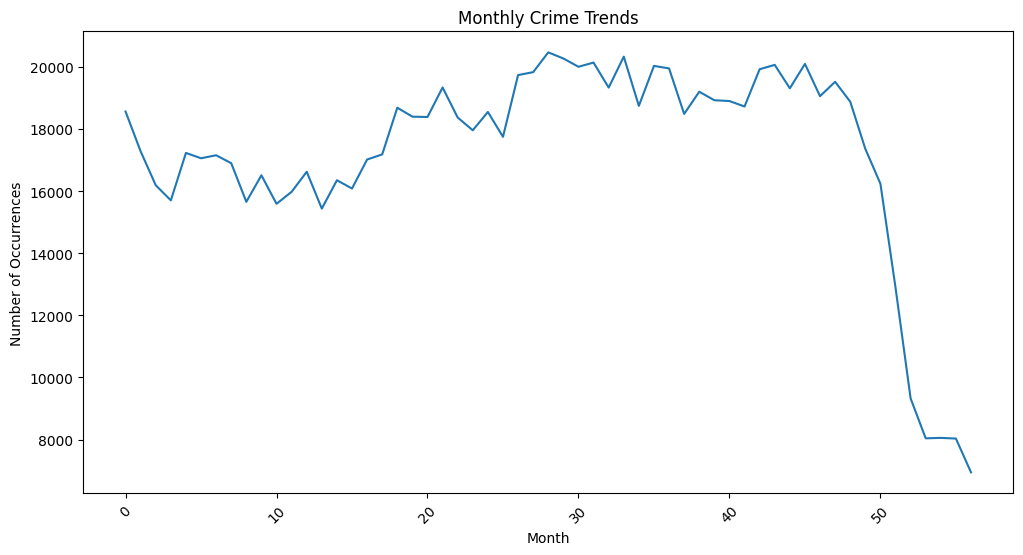

In [ ]:
# starting with the SARIMA
# link to references: https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/
# first starting by plotting the monthly crimes
plt.figure(figsize=(12,6))
plt.plot(crimes_per_month['Count'])
plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
# might have to go back convert to dataframe a different way because why is it registering the months as simple numbers ...


In [ ]:
# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(crimes_per_month['Count'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                              Count   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -367.402
Date:                            Thu, 24 Oct 2024   AIC                            744.803
Time:                                    17:08:55   BIC                            753.724
Sample:                                         0   HQIC                           748.112
                                             - 57                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1019      0.282      0.362      0.717      -0.450       0.654
ma.L1          0.1607      0.279   

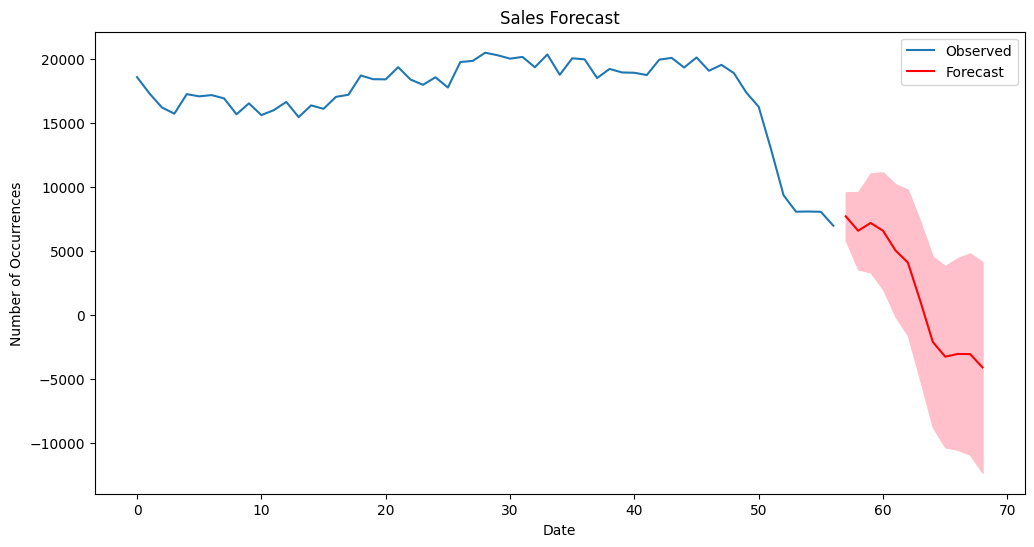

In [ ]:
# Forecast future values
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
# Access the column using 'Count' instead of 'count'
plt.plot(crimes_per_month['Count'], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Occurrences")
plt.legend()
plt.show()

In [ ]:
# going to calculate the mse and rmse
mse = mean_squared_error(testing['Count'], predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 61202320.31995648
Root Mean Squared Error (RMSE): 7823.191185185013


In [ ]:
# going to examine the most popular crimes in which the age column == 0
df_age_zero = df[df['Vict Age'] == 0]
# now going to do the number of crime occurences
crime_counts_zero = df_age_zero['Crm Cd Desc'].value_counts()
pd.set_option("display.max_rows", None)

print(crime_counts)


     YearMonth                                        Crm Cd Desc  Count
0      2020-01                                              ARSON     45
1      2020-01       ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER      1
2      2020-01     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    810
3      2020-01                                  ATTEMPTED ROBBERY    105
4      2020-01                           BATTERY - SIMPLE ASSAULT   1534
5      2020-01                           BATTERY ON A FIREFIGHTER      1
6      2020-01                            BATTERY POLICE (SIMPLE)     57
7      2020-01                        BATTERY WITH SEXUAL CONTACT    122
8      2020-01                                      BIKE - STOLEN    156
9      2020-01                                      BOAT - STOLEN      4
10     2020-01                                         BOMB SCARE     16
11     2020-01                                    BRANDISH WEAPON    235
12     2020-01                                     